In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow 
import math

In [59]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU


In [60]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [61]:
ankle_data = pd.read_csv(r"/home/gaurav/Desktop/biped data/ankleAngles.csv", usecols=[1], names=['ankleData'])

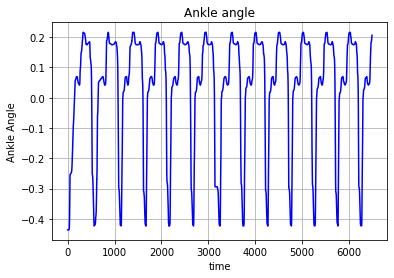

In [62]:
plt.plot(ankle_data, color='blue')
plt.title("Ankle angle")
plt.xlabel("time")
plt.ylabel('Ankle Angle')
plt.grid(True)
plt.show()

In [63]:
#convert the dataset from dataframe to array
ankledata = ankle_data.values
ankledata = ankledata.astype('float32')       #convert it into float

In [64]:
#Normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(ankledata)

In [65]:
#Split the dataset into train and test part
#We will use 70% for train and 30% for test case.
traindata = int(len(dataset)*0.70)
testdata = len(dataset) - traindata

In [66]:
traindata , testdata

(4542, 1947)

In [67]:
train = dataset[:traindata,:]

In [68]:
train.shape

(4542, 1)

In [69]:
test = dataset[traindata:,:]

In [70]:
test.shape

(1947, 1)

In [71]:
def create_dataset(dataset, lookback=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - lookback - 1):
        a = dataset[i:(i+lookback), 0]
        dataX.append(a)
        dataY.append(dataset[i+lookback])
    return np.array(dataX), np.array(dataY)

In [72]:
lookback = 50
trainX, trainY = create_dataset(train, lookback)
testX, testY = create_dataset(test, lookback)

In [73]:
#Reshape input data to [samples, timesteps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [74]:
model = Sequential()
model.add(LSTM(10, input_shape=(1,lookback)))
model.add(Dense(1))
#model.add(Activation('tanh'))
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mean_squared_error', optimizer='adam')
#model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

In [75]:
model_gru = Sequential()
model_gru.add(GRU(75, return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
model_gru.add(GRU(units=30, return_sequences=True))
model_gru.add(GRU(units=30))
model_gru.add(Dense(units=1))
model_gru.compile(loss='mae', optimizer='adam')


In [76]:
gru_history = model_gru.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY), shuffle=False)

Train on 4491 samples, validate on 1896 samples
Epoch 1/10
4491/4491 [==============================] - 3s 764us/step - loss: 0.1730 - val_loss: 0.0971
Epoch 2/10
4491/4491 [==============================] - 1s 130us/step - loss: 0.0676 - val_loss: 0.0486
Epoch 3/10
4491/4491 [==============================] - 1s 141us/step - loss: 0.0753 - val_loss: 0.0621
Epoch 4/10
4491/4491 [==============================] - 1s 155us/step - loss: 0.0482 - val_loss: 0.0359
Epoch 5/10
4491/4491 [==============================] - 1s 140us/step - loss: 0.0427 - val_loss: 0.0290
Epoch 6/10
4491/4491 [==============================] - 1s 149us/step - loss: 0.0365 - val_loss: 0.0369
Epoch 7/10
4491/4491 [==============================] - 1s 145us/step - loss: 0.0361 - val_loss: 0.0314
Epoch 8/10
4491/4491 [==============================] - 1s 125us/step - loss: 0.0419 - val_loss: 0.0246
Epoch 9/10
4491/4491 [==============================] - 1s 124us/step - loss: 0.0341 - val_loss: 0.0437
Epoch 10/10
4491

In [77]:
gru_model = Sequential()
gru_model.add(GRU(10, input_shape=(1, lookback)))
gru_model.add(Dense(units=1))
gru_model.compile(loss='mae', optimizer='adam')

In [78]:
gru_model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
 - 10s - loss: 0.0397
Epoch 2/50
 - 9s - loss: 0.0251
Epoch 3/50
 - 9s - loss: 0.0215
Epoch 4/50
 - 9s - loss: 0.0189
Epoch 5/50
 - 9s - loss: 0.0171
Epoch 6/50
 - 9s - loss: 0.0168
Epoch 7/50
 - 9s - loss: 0.0166
Epoch 8/50
 - 9s - loss: 0.0149
Epoch 9/50
 - 9s - loss: 0.0146
Epoch 10/50
 - 9s - loss: 0.0141
Epoch 11/50
 - 9s - loss: 0.0140
Epoch 12/50
 - 9s - loss: 0.0134
Epoch 13/50
 - 9s - loss: 0.0131
Epoch 14/50
 - 9s - loss: 0.0133
Epoch 15/50
 - 9s - loss: 0.0126
Epoch 16/50
 - 9s - loss: 0.0131
Epoch 17/50
 - 9s - loss: 0.0125
Epoch 18/50
 - 9s - loss: 0.0124
Epoch 19/50
 - 9s - loss: 0.0128
Epoch 20/50
 - 9s - loss: 0.0121
Epoch 21/50
 - 9s - loss: 0.0117
Epoch 22/50
 - 9s - loss: 0.0120
Epoch 23/50
 - 9s - loss: 0.0119
Epoch 24/50
 - 9s - loss: 0.0117
Epoch 25/50
 - 9s - loss: 0.0112
Epoch 26/50
 - 9s - loss: 0.0116
Epoch 27/50
 - 9s - loss: 0.0110
Epoch 28/50
 - 9s - loss: 0.0114
Epoch 29/50
 - 9s - loss: 0.0108
Epoch 30/50
 - 9s - loss: 0.0114
Epoch 31/50
 - 9s 

In [79]:
trainPredict = gru_model.predict(trainX)
testPredict = gru_model.predict(testX)

In [87]:
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

In [98]:
trainY = scaler.inverse_transform(trainY).T
testY = scaler.inverse_transform(testY).T

In [99]:
trainPredict.shape, testPredict.shape

((4491, 1), (1896, 1))

In [100]:
trainY.shape, testY.shape

((1, 4491), (1, 1896))

In [101]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' %(trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test score: %.2f RMSE' %(testScore))

Train Score: 0.48 RMSE
Test score: 0.01 RMSE


In [102]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[lookback:len(trainPredict)+lookback, :] = trainPredict

In [103]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(trainPredict)+(lookback*2)+1:len(dataset)-1, :] = testPredict

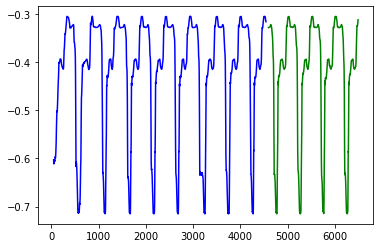

In [105]:
#plt.plot(ankledata)
plt.plot(trainPredictPlot, color='blue')
plt.plot(testPredictPlot, color='green')
plt.show()